In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, precision_score, recall_score, auc
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
import xgboost as xgb
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc, f1_score, make_scorer

In [3]:
file_name = 'dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)
# Create a copy of the original DataFrame
df_copy = df.copy()

# EDA

In [212]:
# Explore the data structure
print('Data Shape:', df.shape)
print('\nData Head:')
print(df.head())
print('\nData Info:')
print(df.info())

Data Shape: (150000, 10)

Data Head:
   monthly_income  debt_ratio  nr_dependents  \
0          9120.0    0.802982            2.0   
1          2600.0    0.121876            1.0   
2          3042.0    0.085113            0.0   
3          3300.0    0.036050            0.0   
4         63588.0    0.024926            0.0   

   credit_balances_dividedby_limits  nr_open_credit_lines_and_loans  \
0                          0.766127                              13   
1                          0.957151                               4   
2                          0.658180                               2   
3                          0.233810                               5   
4                          0.907239                               7   

   nr_real_estate_loans  nr_times_30_59_days_past_due  \
0                     6                             2   
1                     0                             0   
2                     0                             1   
3                  

In [213]:
df.describe()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
count,1.202690e+05,150000.000000,146076.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.670221e+03,353.005076,0.757222,6.048438,8.452760,1.018240,0.421033,0.240387,0.265973,0.066840
std,1.438467e+04,2037.818523,1.115086,249.755371,5.145951,1.129771,4.192781,4.155179,4.169304,0.249746
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000e+03,0.175074,0.000000,0.029867,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.400000e+03,0.366508,0.000000,0.154181,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.249000e+03,0.868254,1.000000,0.559046,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,3.008750e+06,329664.000000,20.000000,50708.000000,58.000000,54.000000,98.000000,98.000000,98.000000,1.000000


In [214]:
# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
monthly_income                      29731
debt_ratio                              0
nr_dependents                        3924
credit_balances_dividedby_limits        0
nr_open_credit_lines_and_loans          0
nr_real_estate_loans                    0
nr_times_30_59_days_past_due            0
nr_times_60_89_days_past_due            0
nr_times_90plus_days_past_due           0
serious_delinquency                     0
dtype: int64


In [215]:
df['serious_delinquency'].value_counts()

0    139974
1     10026
Name: serious_delinquency, dtype: int64

# 2.1. Data Transformations

In [216]:
# Transform debt_ratio into % and round
df_copy['debt_ratio'] = round(df_copy['debt_ratio'] * 100)

# Drop rows with missing values in the 'nr_dependents' column
df_copy_dropped = df_copy.dropna(subset=['nr_dependents'])

# Drop rows with missing values in the 'monthly_income' column
df_copy_dropped = df_copy.dropna(subset=['monthly_income'])


# remove monthly payment outliers
q1,q3 = np.percentile(df_copy_dropped.monthly_income , [25, 75])
iqr = q3-q1
iqr1_5 = q3 + 1.5*iqr
iqr1_5
outliers = df_copy_dropped[df_copy_dropped["monthly_income"] >= iqr1_5]
df_copy_dropped.drop(index=outliers.index, inplace=True)
df_copy_dropped



df_copy_dropped['monthly_income'] = df_copy_dropped['monthly_income'].round(2)
# Display the first few rows of the updated DataFrame
print("\nUpdated DataFrame:")

df_copy_dropped.describe()


Updated DataFrame:


C:\Users\inesm\AppData\Local\Temp\ipykernel_18224\644253443.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_dropped.drop(index=outliers.index, inplace=True)
C:\Users\inesm\AppData\Local\Temp\ipykernel_18224\644253443.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_dropped['monthly_income'] = df_copy_dropped['monthly_income'].round(2)


,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
count,115390.000000,1.153900e+05,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000
mean,5761.661461,2.771290e+03,0.833902,5.117912,8.633928,1.010443,0.386307,0.192894,0.218286,0.070379
std,3282.542436,4.332917e+04,1.137264,206.346372,5.089336,1.072651,3.557760,3.507479,3.525184,0.255785
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3325.000000,1.500000e+01,0.000000,0.034779,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5200.000000,3.000000e+01,0.000000,0.178514,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7809.000000,4.900000e+01,1.000000,0.585658,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,15520.000000,6.110650e+06,20.000000,29110.000000,58.000000,54.000000,98.000000,98.000000,98.000000,1.000000


## 2.2. Profile of the median person

In [217]:
df_copy[df_copy['serious_delinquency'] == 1].describe()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
count,8357.000000,1.002600e+04,9847.000000,10026.000000,10026.000000,10026.000000,10026.00000,10026.000000,10026.000000,10026.0
mean,5630.826493,2.951210e+04,0.948208,4.367282,7.882306,0.988530,2.38849,1.828047,2.091362,1.0
std,6171.719674,1.238360e+05,1.219367,131.835778,5.653601,1.425723,11.73451,11.753068,11.762760,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,2963.000000,1.900000e+01,0.000000,0.398219,4.000000,0.000000,0.00000,0.000000,0.000000,1.0
50%,4500.000000,4.300000e+01,0.000000,0.838853,7.000000,1.000000,0.00000,0.000000,0.000000,1.0
75%,6800.000000,8.900000e+01,2.000000,1.000000,11.000000,2.000000,2.00000,1.000000,1.000000,1.0
max,250000.000000,3.879300e+06,8.000000,8328.000000,57.000000,29.000000,98.00000,98.000000,98.000000,1.0


In [218]:
df_copy[df_copy['serious_delinquency'] == 0].describe()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
count,1.119120e+05,1.399740e+05,136229.000000,139974.000000,139974.000000,139974.000000,139974.000000,139974.000000,139974.000000,139974.0
mean,6.747838e+03,3.571511e+04,0.743417,6.168855,8.493620,1.020368,0.280109,0.126666,0.135225,0.0
std,1.481350e+04,2.083282e+05,1.105895,256.126350,5.105229,1.105512,2.946075,2.900930,2.909088,0.0
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.461000e+03,1.700000e+01,0.000000,0.026983,5.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5.466000e+03,3.600000e+01,0.000000,0.133288,8.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,8.333000e+03,8.700000e+01,1.000000,0.487686,11.000000,2.000000,0.000000,0.000000,0.000000,0.0
max,3.008750e+06,3.296640e+07,20.000000,50708.000000,58.000000,54.000000,98.000000,98.000000,98.000000,0.0


In [219]:
print('% in finantial distress',(df_copy_dropped[df_copy_dropped['serious_delinquency'] == 1]['monthly_income'].count())/(df_copy_dropped['monthly_income'].count()))
print('% NOT in finantial distress',(df_copy_dropped[df_copy_dropped['serious_delinquency'] == 0]['monthly_income'].count())/(df_copy_dropped['monthly_income'].count()))

% in finantial distress 0.07037871565993586
% NOT in finantial distress 0.9296212843400641


## 2.3. Number of dependents

In [220]:
summary_stats = df_copy_dropped.groupby('serious_delinquency')['nr_dependents'].describe()
print(summary_stats)

                        count      mean       std  min  25%  50%  75%   max
serious_delinquency                                                        
0                    107269.0  0.818289  1.127975  0.0  0.0  0.0  1.0  20.0
1                      8121.0  1.040143  1.235204  0.0  0.0  1.0  2.0   8.0


In [221]:
df_copy_dropped.describe()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
count,115390.000000,1.153900e+05,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000,115390.000000
mean,5761.661461,2.771290e+03,0.833902,5.117912,8.633928,1.010443,0.386307,0.192894,0.218286,0.070379
std,3282.542436,4.332917e+04,1.137264,206.346372,5.089336,1.072651,3.557760,3.507479,3.525184,0.255785
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3325.000000,1.500000e+01,0.000000,0.034779,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5200.000000,3.000000e+01,0.000000,0.178514,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7809.000000,4.900000e+01,1.000000,0.585658,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,15520.000000,6.110650e+06,20.000000,29110.000000,58.000000,54.000000,98.000000,98.000000,98.000000,1.000000


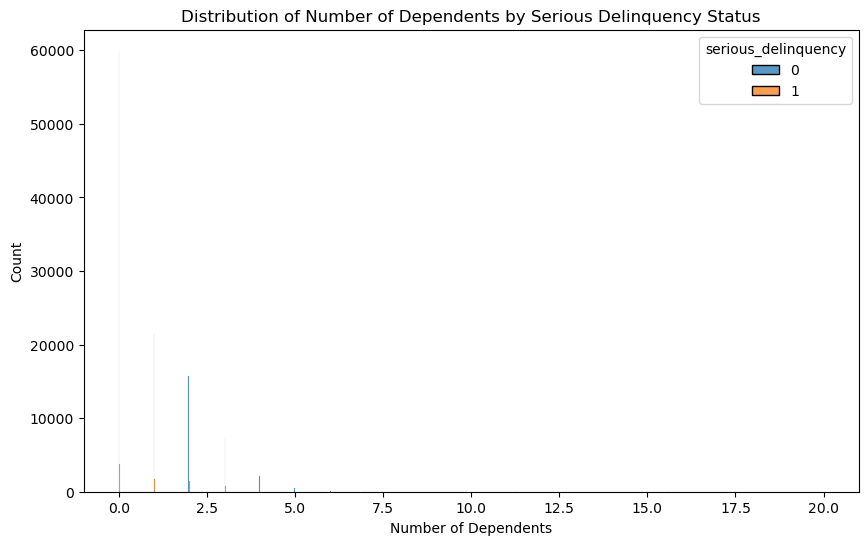

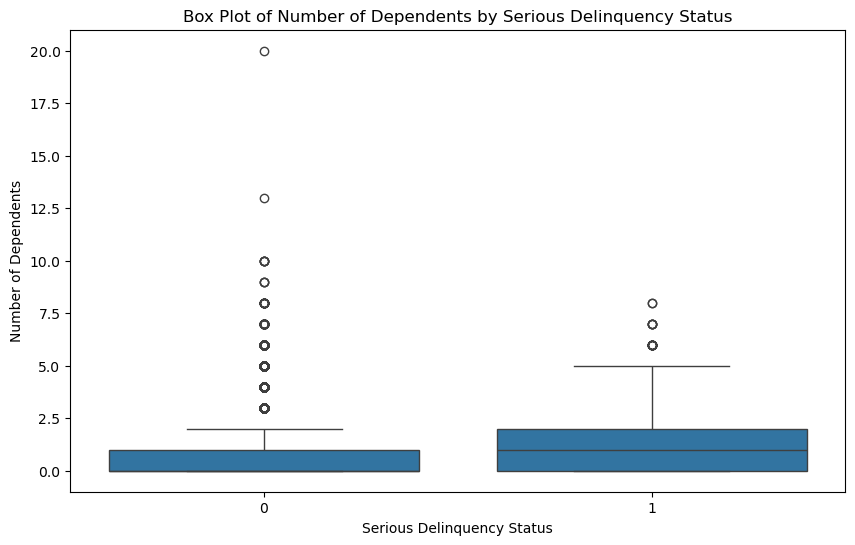

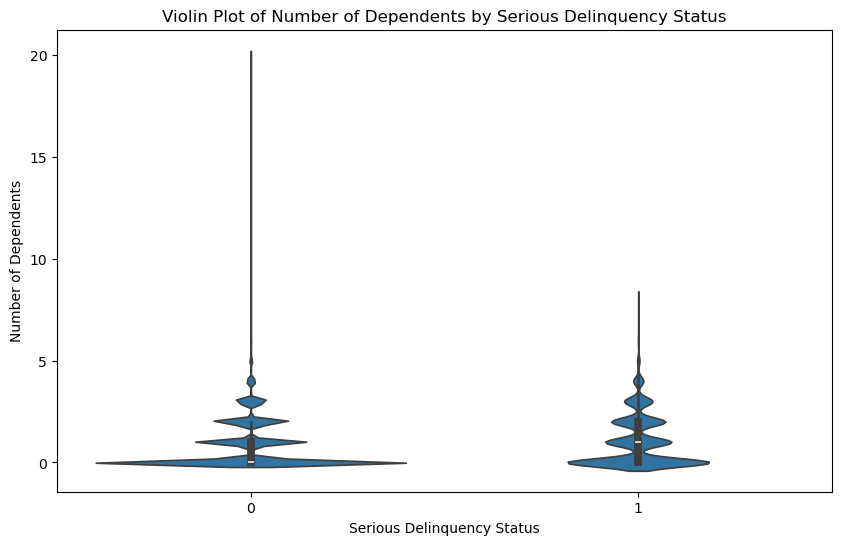

In [222]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy_dropped, x='nr_dependents', hue='serious_delinquency', multiple='dodge', shrink=0.8)
plt.title('Distribution of Number of Dependents by Serious Delinquency Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_dropped, x='serious_delinquency', y='nr_dependents')
plt.title('Box Plot of Number of Dependents by Serious Delinquency Status')
plt.xlabel('Serious Delinquency Status')
plt.ylabel('Number of Dependents')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy_dropped, x='serious_delinquency', y='nr_dependents')
plt.title('Violin Plot of Number of Dependents by Serious Delinquency Status')
plt.xlabel('Serious Delinquency Status')
plt.ylabel('Number of Dependents')
plt.show()


## 2.4. debt_ratio

                        count         mean           std  min   25%   50%  \
serious_delinquency                                                         
0                    107269.0  2813.769952  43703.765447  0.0  14.0  30.0   
1                      8121.0  2210.182982  38034.491632  0.0  17.0  36.0   

                      75%        max  
serious_delinquency                   
0                    48.0  6110650.0  
1                    60.0  2080900.0  


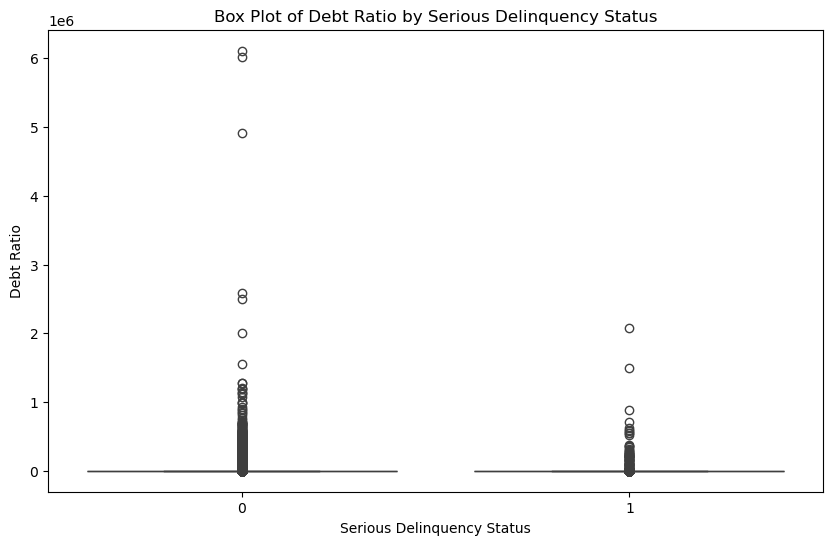

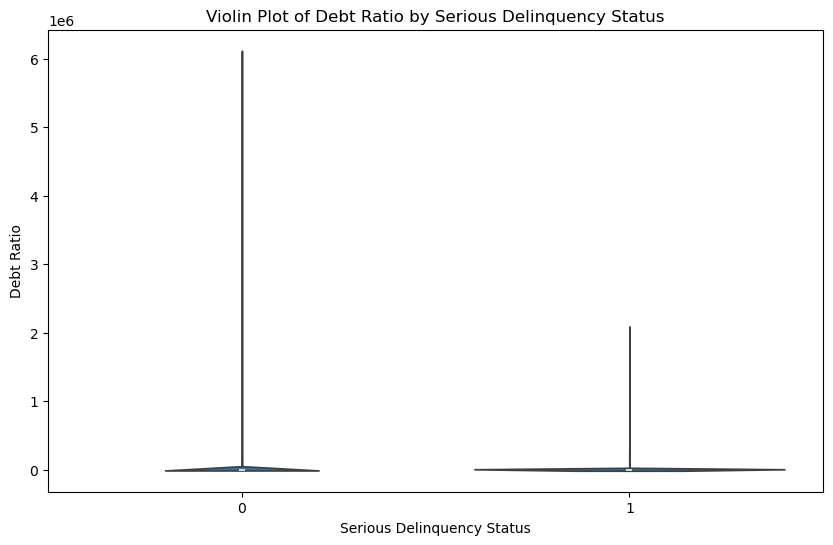

In [223]:
# Summary statistics grouped by 'serious_delinquency'
summary_stats = df_copy_dropped.groupby('serious_delinquency')['debt_ratio'].describe()
print(summary_stats)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_dropped, x='serious_delinquency', y='debt_ratio')
plt.title('Box Plot of Debt Ratio by Serious Delinquency Status')
plt.xlabel('Serious Delinquency Status')
plt.ylabel('Debt Ratio')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_copy_dropped, x='serious_delinquency', y='debt_ratio')
plt.title('Violin Plot of Debt Ratio by Serious Delinquency Status')
plt.xlabel('Serious Delinquency Status')
plt.ylabel('Debt Ratio')
plt.show()

# # Histogram
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df_copy_dropped, x='debt_ratio', hue='serious_delinquency', multiple='stack')
# plt.title('Distribution of Debt Ratio by Serious Delinquency Status')
# plt.xlabel('Debt Ratio')
# plt.ylabel('Count')
# plt.show()


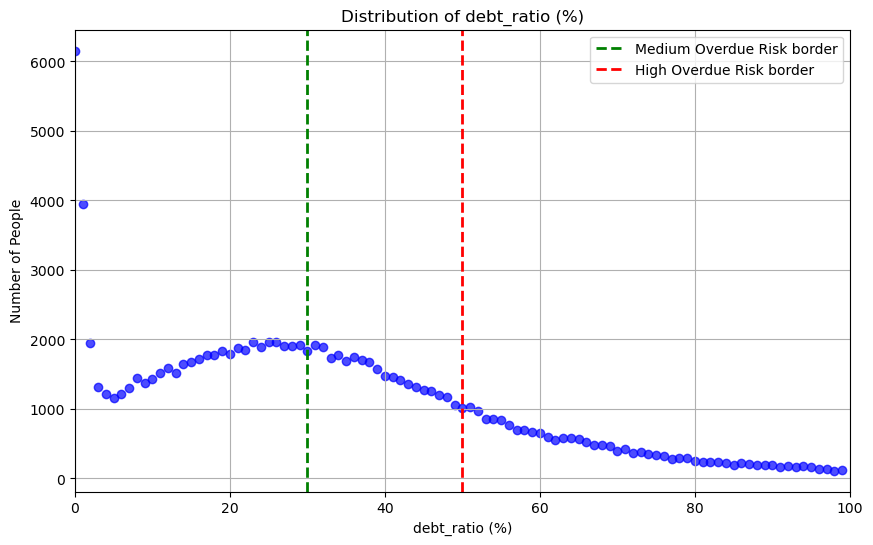

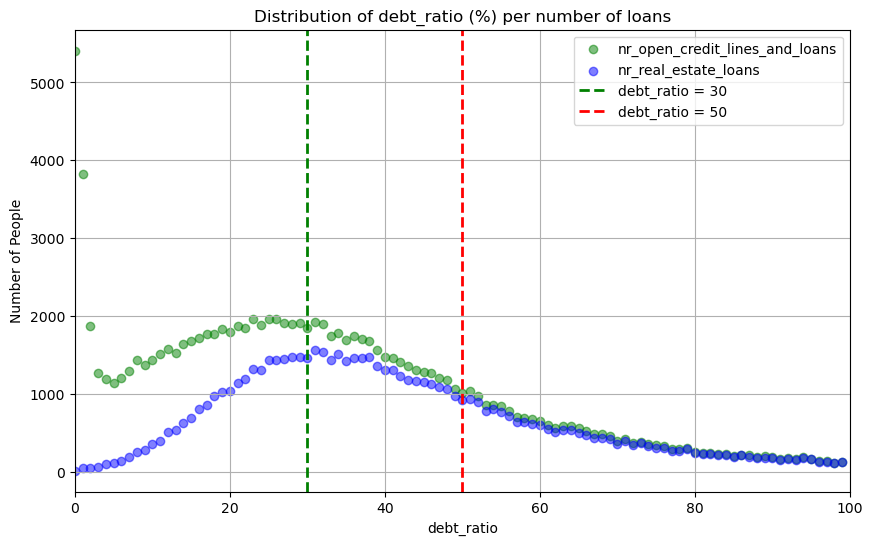

In [224]:
# Calculate the frequency of each debt_rate value in bins
bin_edges = range(0, 101)  # Define bins from 0 to 100
hist, bin_edges = pd.cut(df_copy_dropped['debt_ratio'], bins=bin_edges, right=False, retbins=True)
counts = hist.value_counts(sort=False)

# Create a scatter plot of the binned DSTI values
plt.figure(figsize=(10, 6))
plt.scatter(counts.index.categories.left, counts.values, color='blue', alpha=0.7)

# Add vertical lines for risk levels
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='Medium Overdue Risk border')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='High Overdue Risk border')

# Plot details
plt.title('Distribution of debt_ratio (%)')
plt.xlabel('debt_ratio (%)')
plt.ylabel('Number of People')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()




# ---
# plot pessoa que tenha estado em cada tipo de past_due e se chega a serious deliquency:
# Function to calculate counts of individuals with values != 0 in that category

data = df_copy_dropped
# Calculate counts for each group
credit_lines_and_loans = calculate_counts('nr_open_credit_lines_and_loans', data)
real_estate_loans = calculate_counts('nr_real_estate_loans', data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(credit_lines_and_loans.index.categories.left, credit_lines_and_loans.values, color='green', alpha=0.5, label='nr_open_credit_lines_and_loans')
plt.scatter(real_estate_loans.index.categories.left, real_estate_loans.values, color='blue', alpha=0.5, label='nr_real_estate_loans')

# Add vertical lines
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='debt_ratio = 30')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='debt_ratio = 50')

# Plot details
plt.title('Distribution of debt_ratio (%) per number of loans')
plt.xlabel('debt_ratio')
plt.ylabel('Number of People')
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

# plot pessoa que tenha estado em cada tipo de past_due e se chega a serious deliquency:
# Function to calculate counts of individuals with values != 0 in that category

# plt.title('Distribution of debt_ratio (%) per number of loans for people with overdue credit')

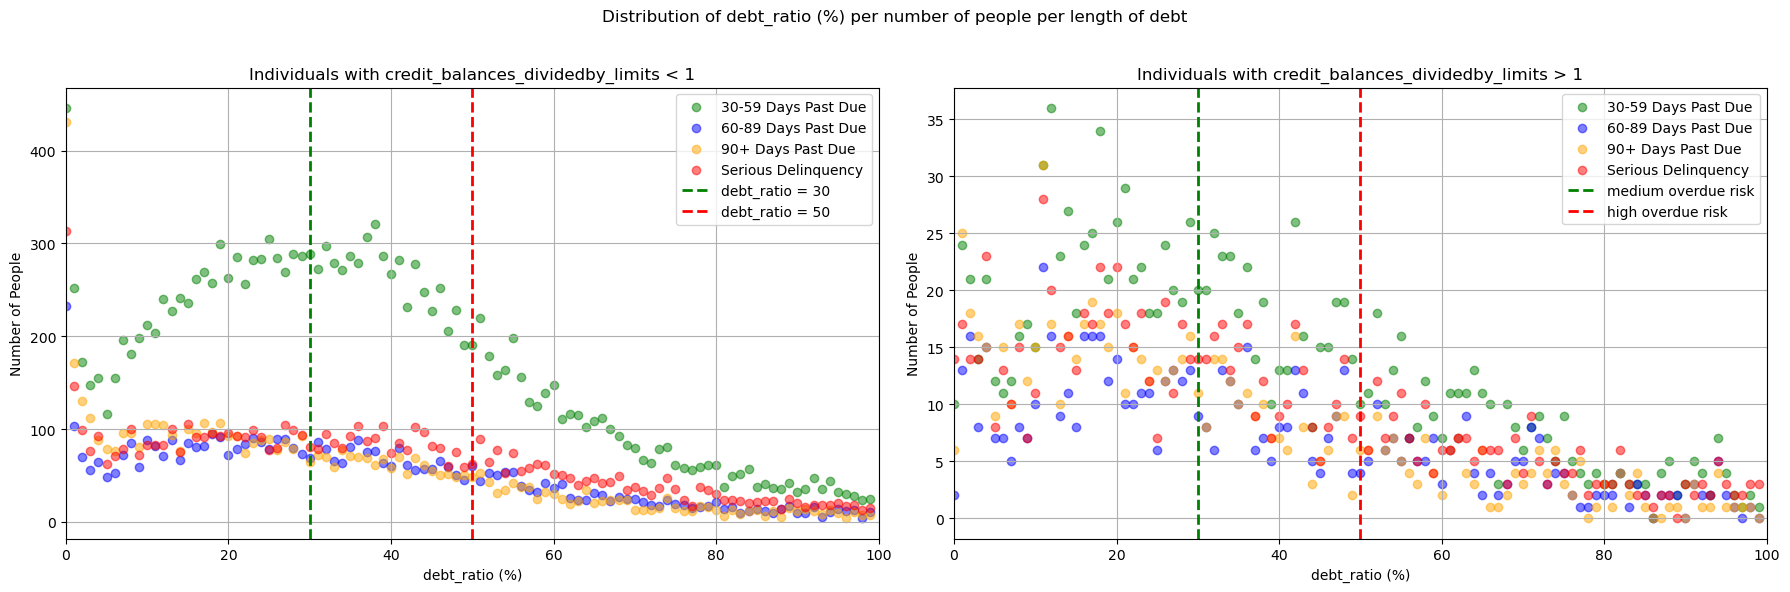

In [225]:
# Function to calculate counts of individuals with values != 0 in that category
def calculate_counts(column_name, data):
    bin_edges = range(0, 101)
    filtered_data = data[data[column_name] > 0]
    hist, bin_edges = pd.cut(filtered_data['debt_ratio'], bins=bin_edges, right=False, retbins=True)
    counts = hist.value_counts(sort=False)
    return counts

data = df_copy_dropped
# Filter data based on credit_balances_dividedby_limits
data_less_1 = data[data['credit_balances_dividedby_limits'] < 1]
data_more_1 = data[data['credit_balances_dividedby_limits'] > 1]

# Calculate counts for each group
counts_30_59_less_1 = calculate_counts('nr_times_30_59_days_past_due', data_less_1)
counts_60_89_less_1 = calculate_counts('nr_times_60_89_days_past_due', data_less_1)
counts_90plus_less_1 = calculate_counts('nr_times_90plus_days_past_due', data_less_1)
counts_serious_delinquency_less_1 = calculate_counts('serious_delinquency', data_less_1)

counts_30_59_more_1 = calculate_counts('nr_times_30_59_days_past_due', data_more_1)
counts_60_89_more_1 = calculate_counts('nr_times_60_89_days_past_due', data_more_1)
counts_90plus_more_1 = calculate_counts('nr_times_90plus_days_past_due', data_more_1)
counts_serious_delinquency_more_1 = calculate_counts('serious_delinquency', data_more_1)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of debt_ratio (%) per number of people per length of debt')

# Plot for credit_balances_dividedby_limits < 1
ax1.scatter(counts_30_59_less_1.index.categories.left, counts_30_59_less_1.values, color='green', alpha=0.5, label='30-59 Days Past Due')
ax1.scatter(counts_60_89_less_1.index.categories.left, counts_60_89_less_1.values, color='blue', alpha=0.5, label='60-89 Days Past Due')
ax1.scatter(counts_90plus_less_1.index.categories.left, counts_90plus_less_1.values, color='orange', alpha=0.5, label='90+ Days Past Due')
ax1.scatter(counts_serious_delinquency_less_1.index.categories.left, counts_serious_delinquency_less_1.values, color='red', alpha=0.5, label='Serious Delinquency')

ax1.axvline(x=30, color='green', linestyle='--', linewidth=2, label='debt_ratio = 30')
ax1.axvline(x=50, color='red', linestyle='--', linewidth=2, label='debt_ratio = 50')

ax1.set_title('Individuals with credit_balances_dividedby_limits < 1')
ax1.set_xlabel('debt_ratio (%)')
ax1.set_ylabel('Number of People')
ax1.set_xlim(0, 100)
ax1.grid(True)
ax1.legend()

# Plot for credit_balances_dividedby_limits > 1
ax2.scatter(counts_30_59_more_1.index.categories.left, counts_30_59_more_1.values, color='green', alpha=0.5, label='30-59 Days Past Due')
ax2.scatter(counts_60_89_more_1.index.categories.left, counts_60_89_more_1.values, color='blue', alpha=0.5, label='60-89 Days Past Due')
ax2.scatter(counts_90plus_more_1.index.categories.left, counts_90plus_more_1.values, color='orange', alpha=0.5, label='90+ Days Past Due')
ax2.scatter(counts_serious_delinquency_more_1.index.categories.left, counts_serious_delinquency_more_1.values, color='red', alpha=0.5, label='Serious Delinquency')

ax2.axvline(x=30, color='green', linestyle='--', linewidth=2, label='medium overdue risk')
ax2.axvline(x=50, color='red', linestyle='--', linewidth=2, label='high overdue risk')

ax2.set_title('Individuals with credit_balances_dividedby_limits > 1')
ax2.set_xlabel('debt_ratio (%)')
ax2.set_ylabel('Number of People')
ax2.set_xlim(0, 100)
ax2.grid(True)
ax2.legend()

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# serious_deliquency

In [226]:
# Class distribution of the target variable
print(df_copy_dropped['serious_delinquency'].value_counts(normalize=True) * 100)


0    92.962128
1     7.037872
Name: serious_delinquency, dtype: float64


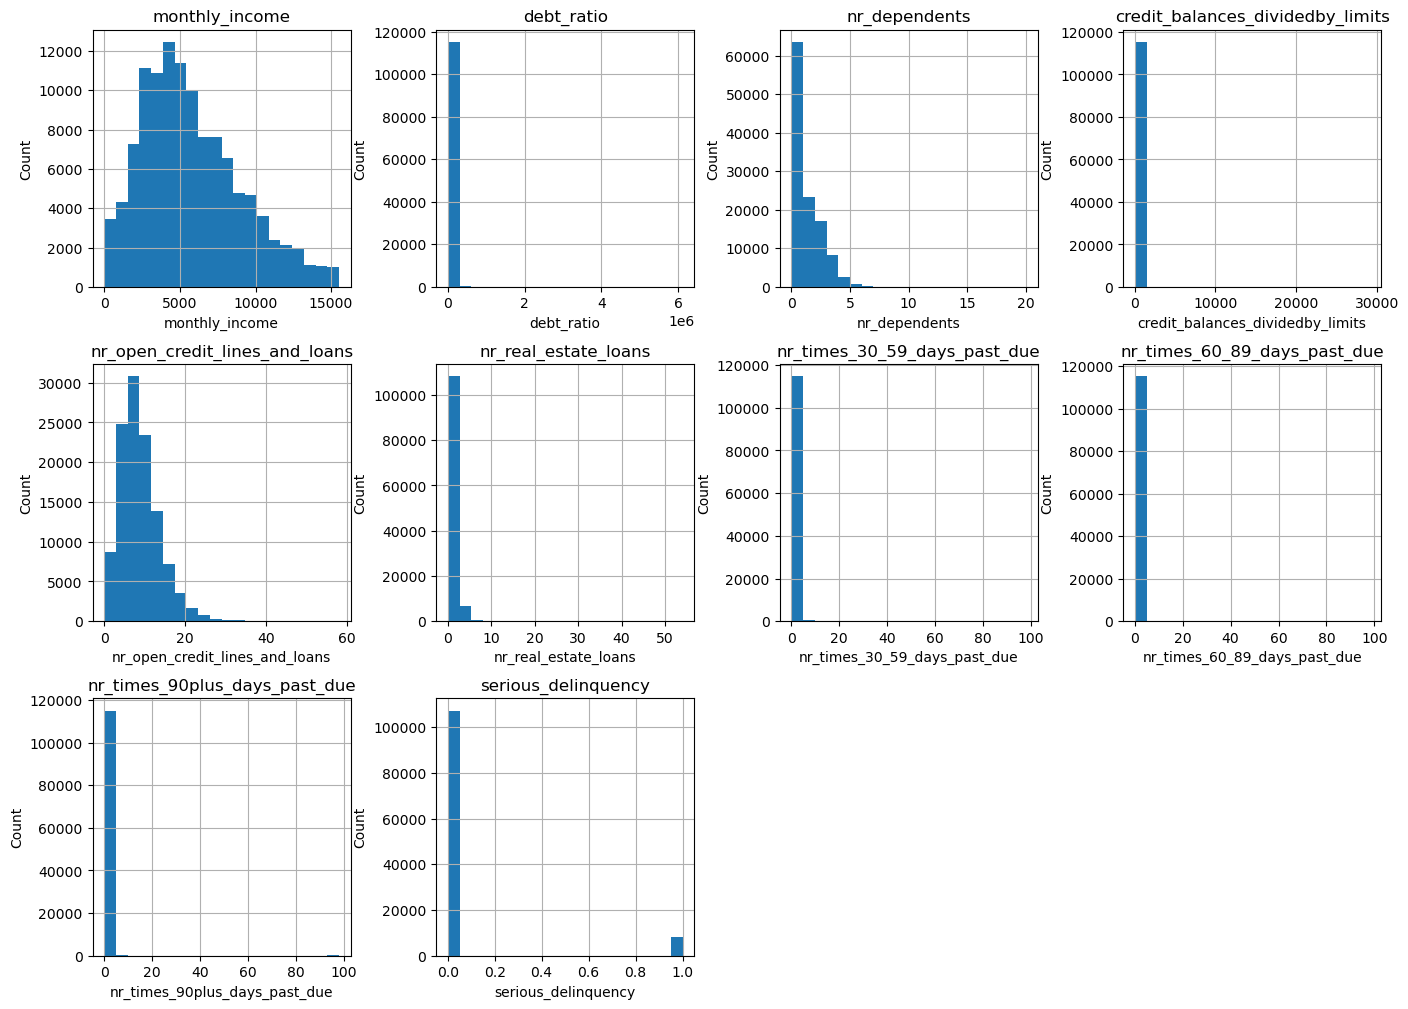

In [227]:
# Histograms for numeric variables
df_copy_dropped.hist(bins=20, figsize=(14, 10), layout=(3, 4))
plt.tight_layout()  # Adjust subplots to fit into the figure area
# Add labels to each subplot
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())  # Set x-axis label to the column name
    ax.set_ylabel('Count')  # Set y-axis label to 'Count'
plt.show()  # Display the histograms


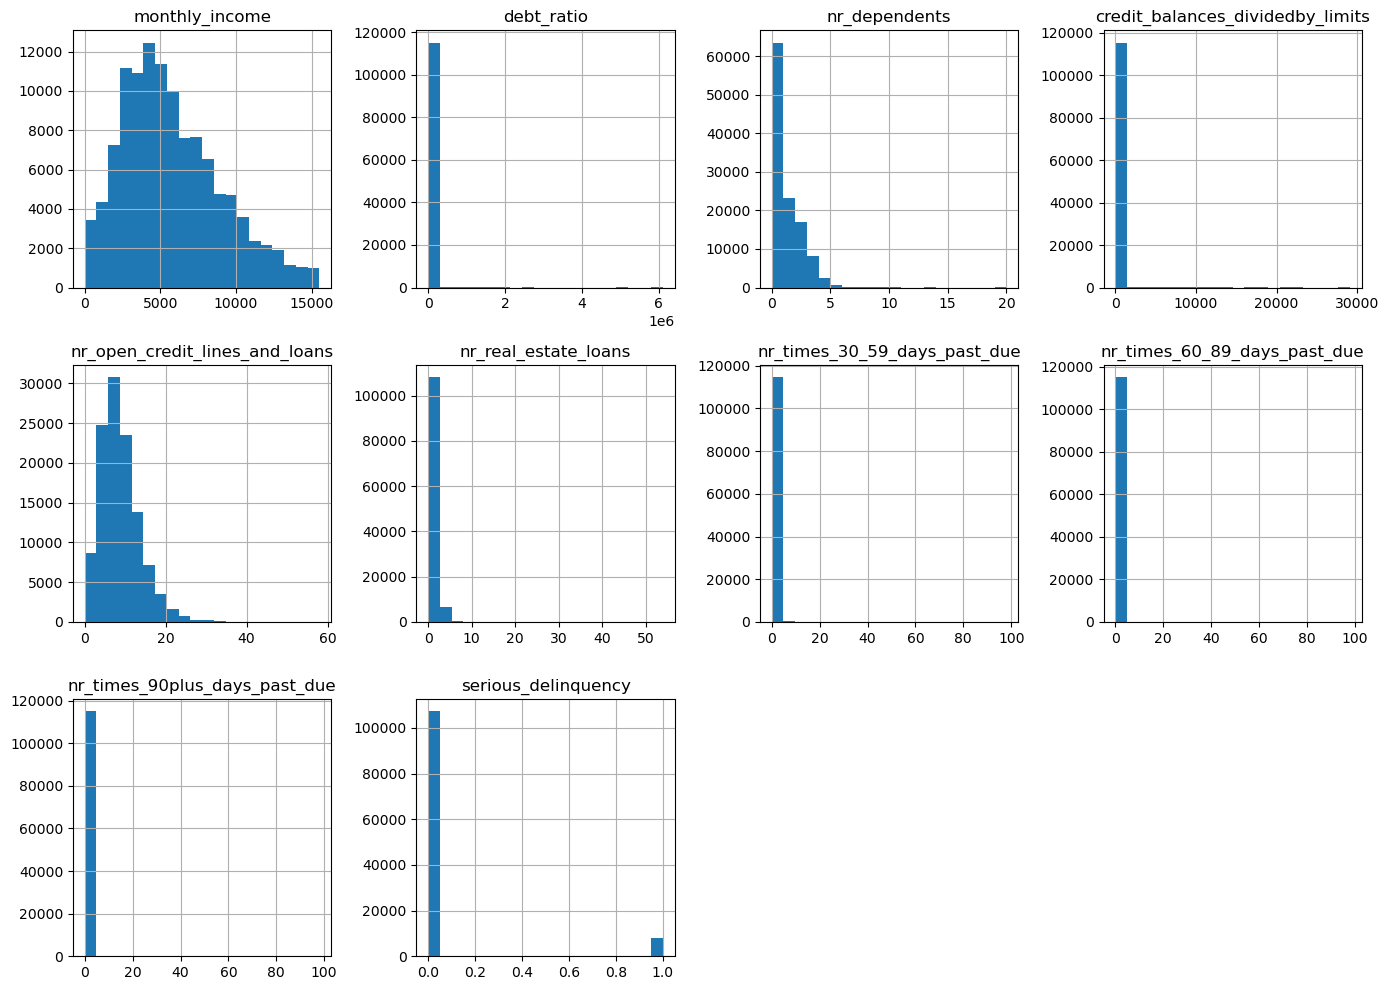

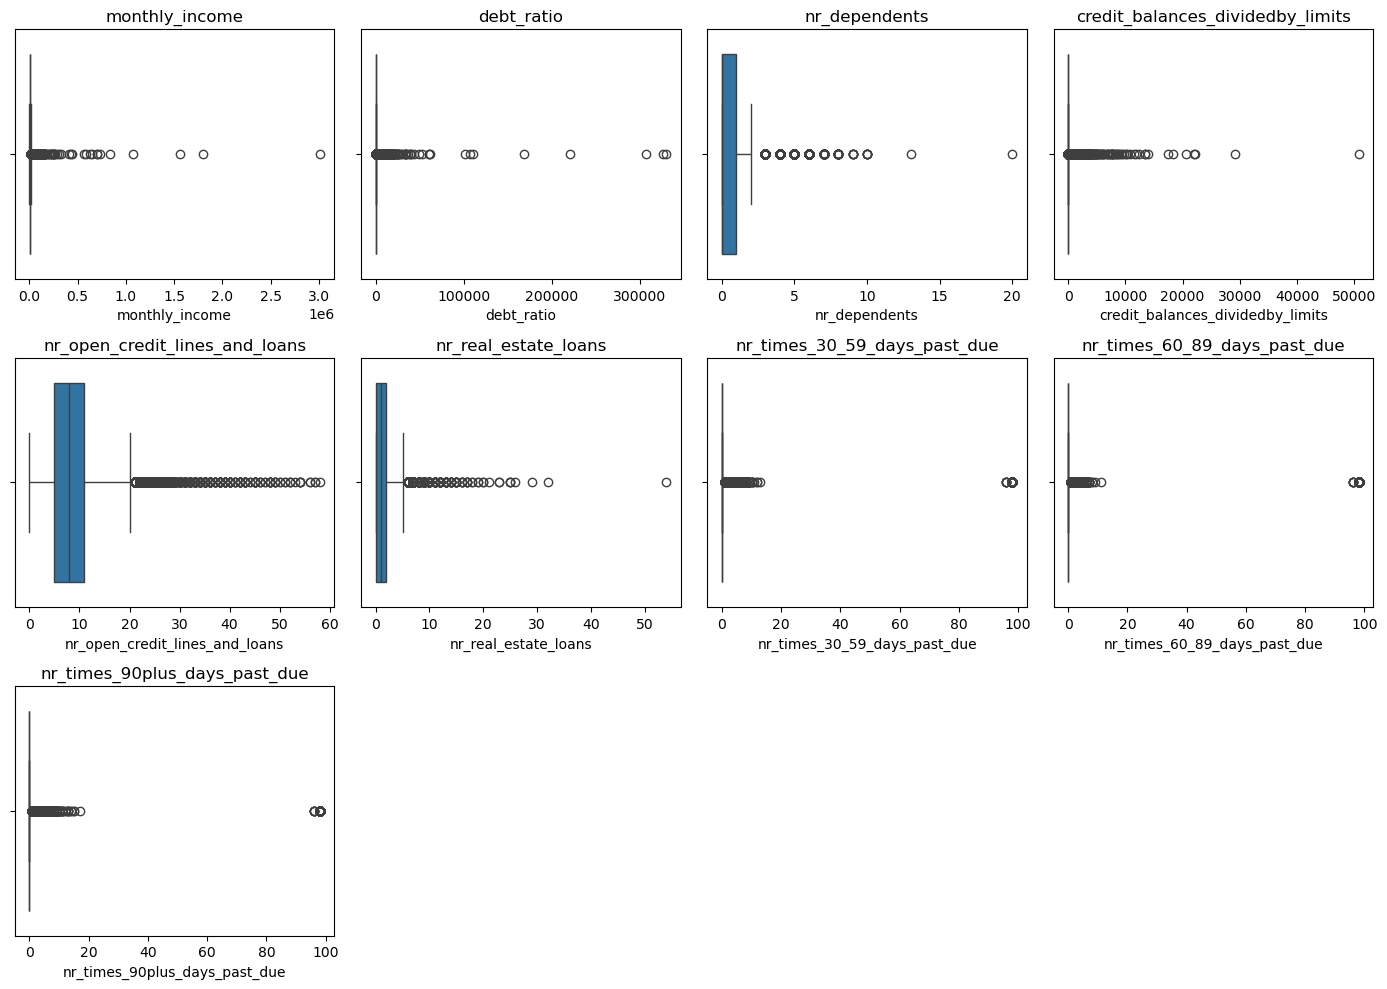

In [228]:
# univariate analysis
# Histograms
df_copy_dropped.hist(bins=20, figsize=(14, 10), layout=(3, 4))
plt.tight_layout()
plt.show()

# Box plots for numeric variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


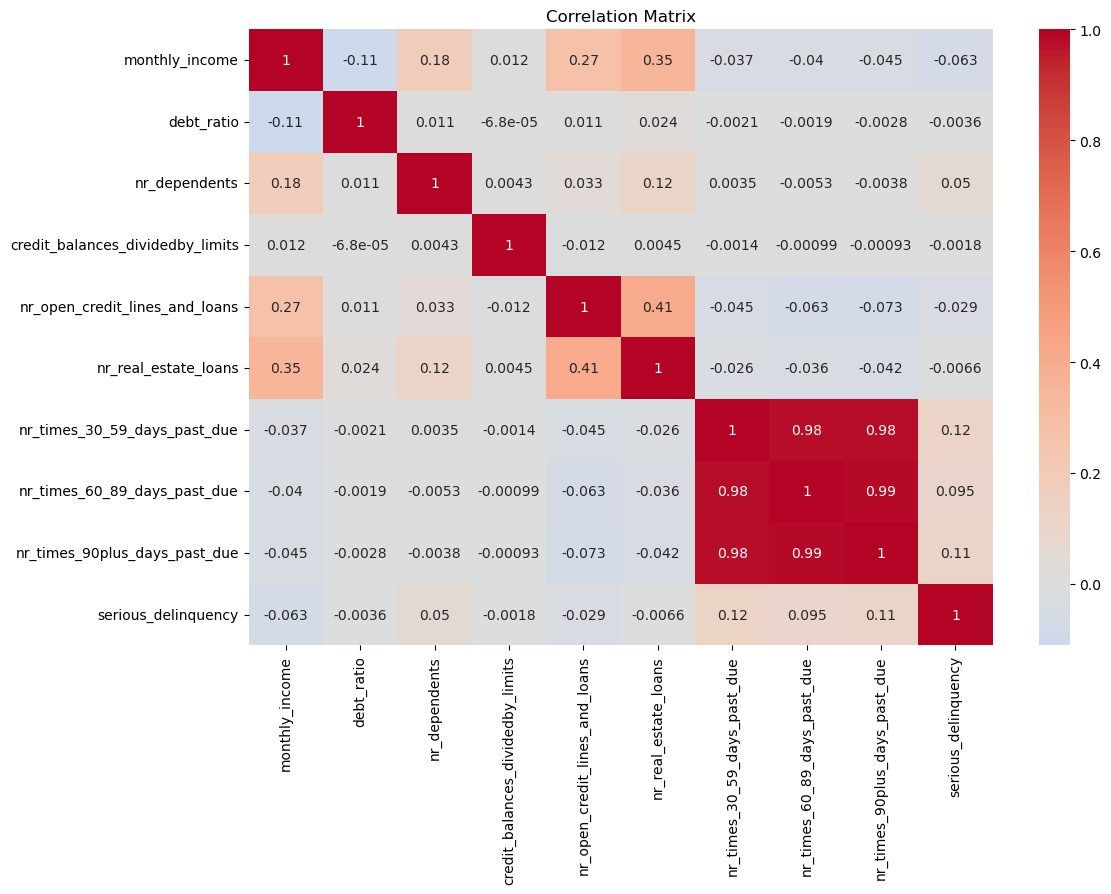

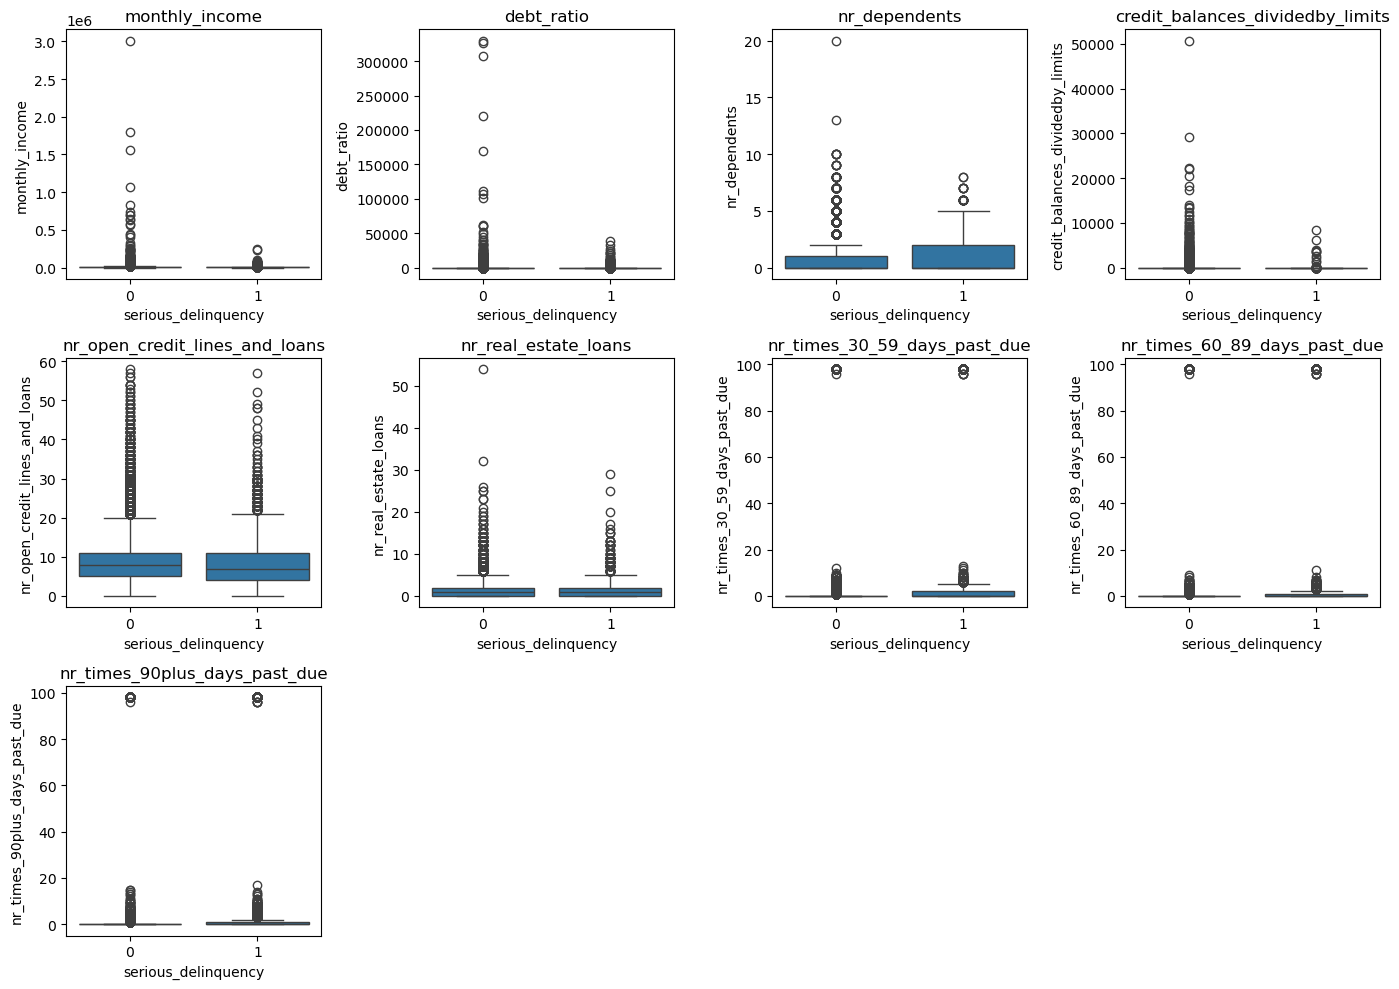

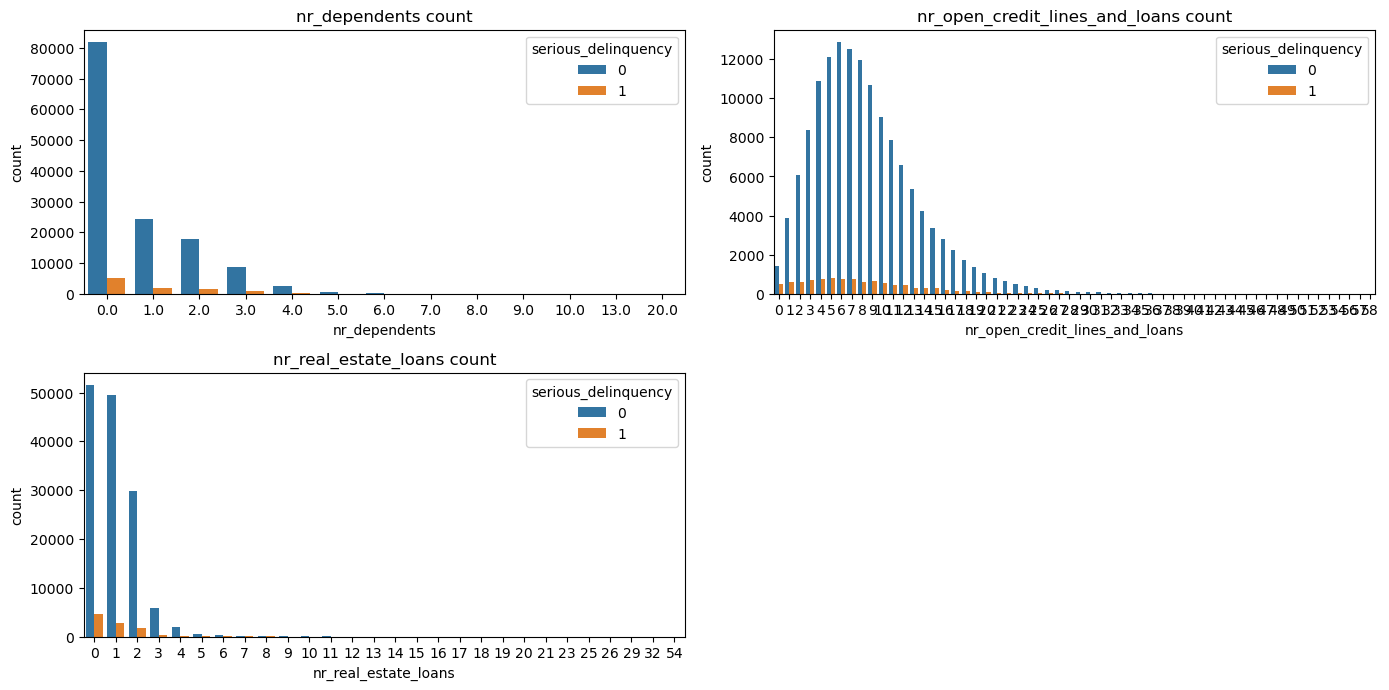

In [229]:
# bivariate analysis
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_copy_dropped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Box plots grouped by `serious_delinquency`
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_copy_dropped.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='serious_delinquency', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

# Count plots for categorical variables grouped by `serious_delinquency`
categorical_vars = ['nr_dependents', 'nr_open_credit_lines_and_loans', 'nr_real_estate_loans']
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='serious_delinquency', data=df)
    plt.title(f'{column} count')
plt.tight_layout()
plt.show()


In [230]:
# Scatter plots to identify potential interactions
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_copy_dropped.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=column, y='debt_ratio', hue='serious_delinquency', data=df)
    plt.title(f'{column} vs Debt Ratio')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

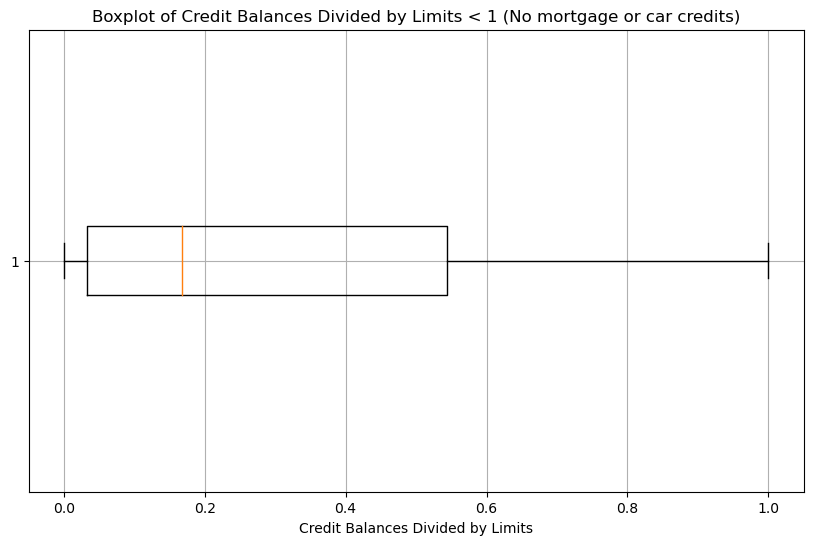

In [231]:
# Create a boxplot of 'credit_balances_dividedby_limits' with a filter
plt.figure(figsize=(10, 6))
plt.boxplot(df_copy_dropped[df_copy_dropped['credit_balances_dividedby_limits'] <= 1]['credit_balances_dividedby_limits'], vert=False)
plt.title('Boxplot of Credit Balances Divided by Limits < 1 (No mortgage or car credits)')
plt.xlabel('Credit Balances Divided by Limits')
plt.grid(True)
plt.show()

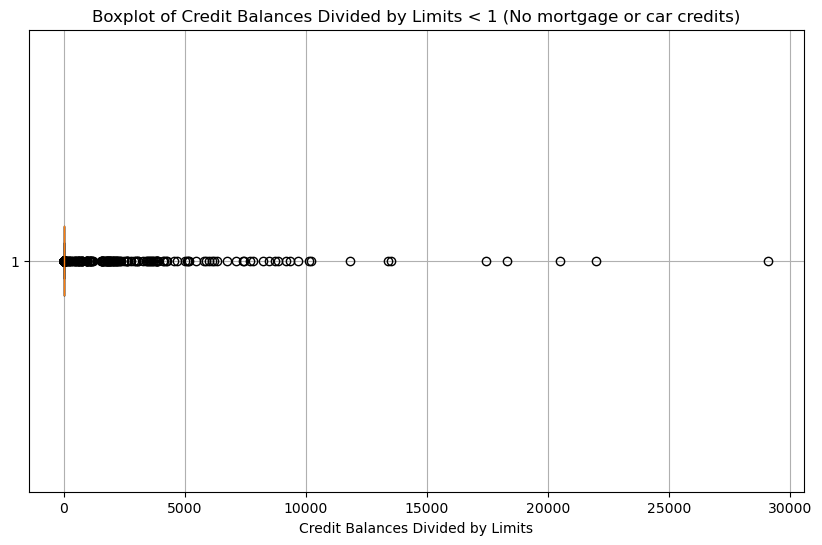

In [232]:
# Create a boxplot of 'credit_balances_dividedby_limits' with a filter
plt.figure(figsize=(10, 6))
plt.boxplot(df_copy_dropped[df_copy_dropped['credit_balances_dividedby_limits'] > 1]['credit_balances_dividedby_limits'], vert=False)
plt.title('Boxplot of Credit Balances Divided by Limits < 1 (No mortgage or car credits)')
plt.xlabel('Credit Balances Divided by Limits')
plt.grid(True)
plt.show()

In [233]:
a = df_copy_dropped[df_copy_dropped['credit_balances_dividedby_limits'] <= 1][['monthly_income','debt_ratio','nr_real_estate_loans','credit_balances_dividedby_limits','nr_open_credit_lines_and_loans','serious_delinquency']]
# ,'nr_dependents'
b = df_copy_dropped[df_copy_dropped['credit_balances_dividedby_limits'] > 1][['debt_ratio','nr_dependents','credit_balances_dividedby_limits','nr_open_credit_lines_and_loans','nr_real_estate_loans','serious_delinquency']]

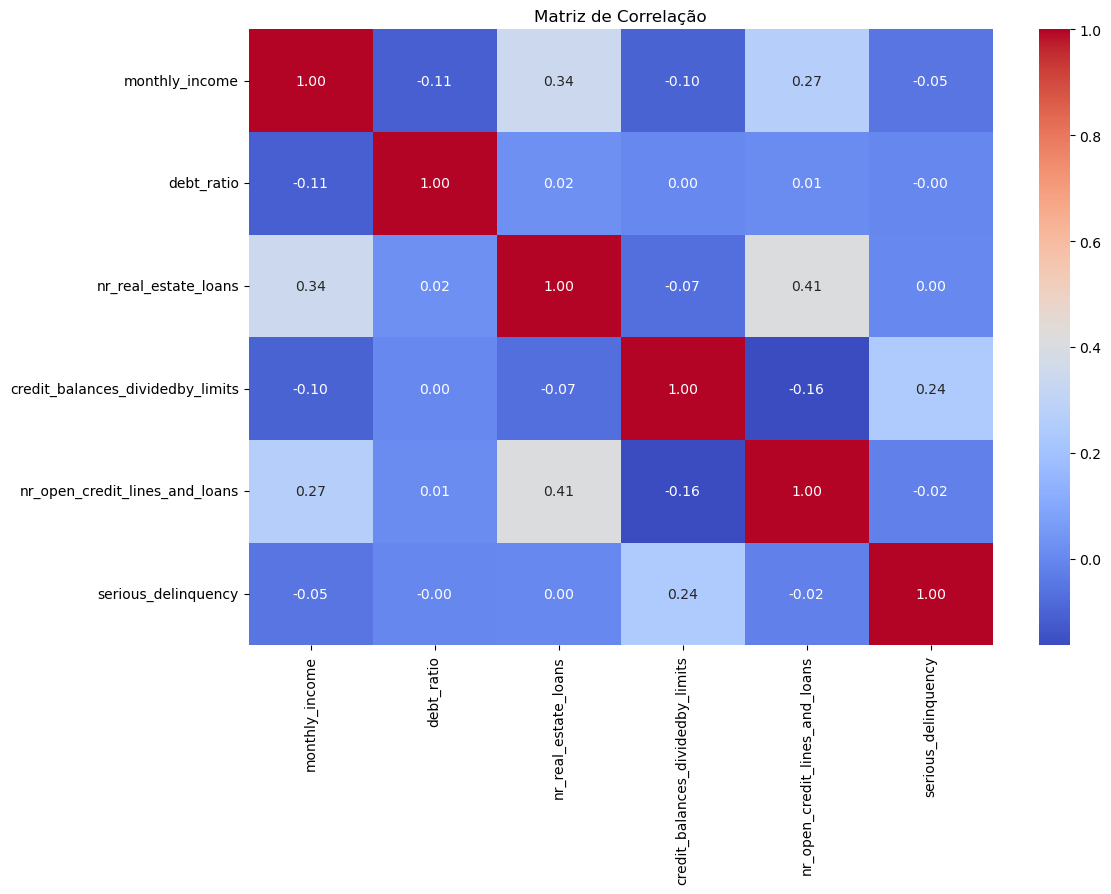

In [234]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

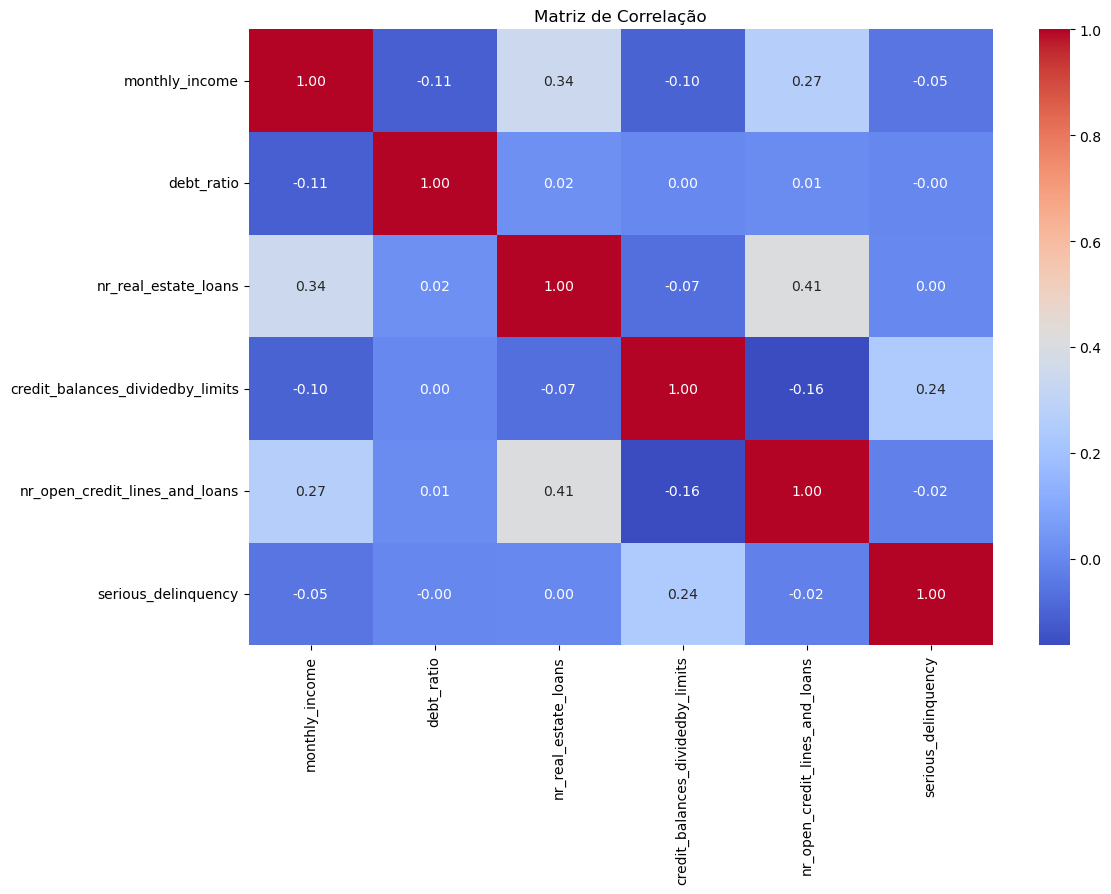

In [235]:
c = df_copy_dropped[['debt_ratio','nr_dependents','credit_balances_dividedby_limits','nr_open_credit_lines_and_loans','nr_real_estate_loans','serious_delinquency']]
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(a.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

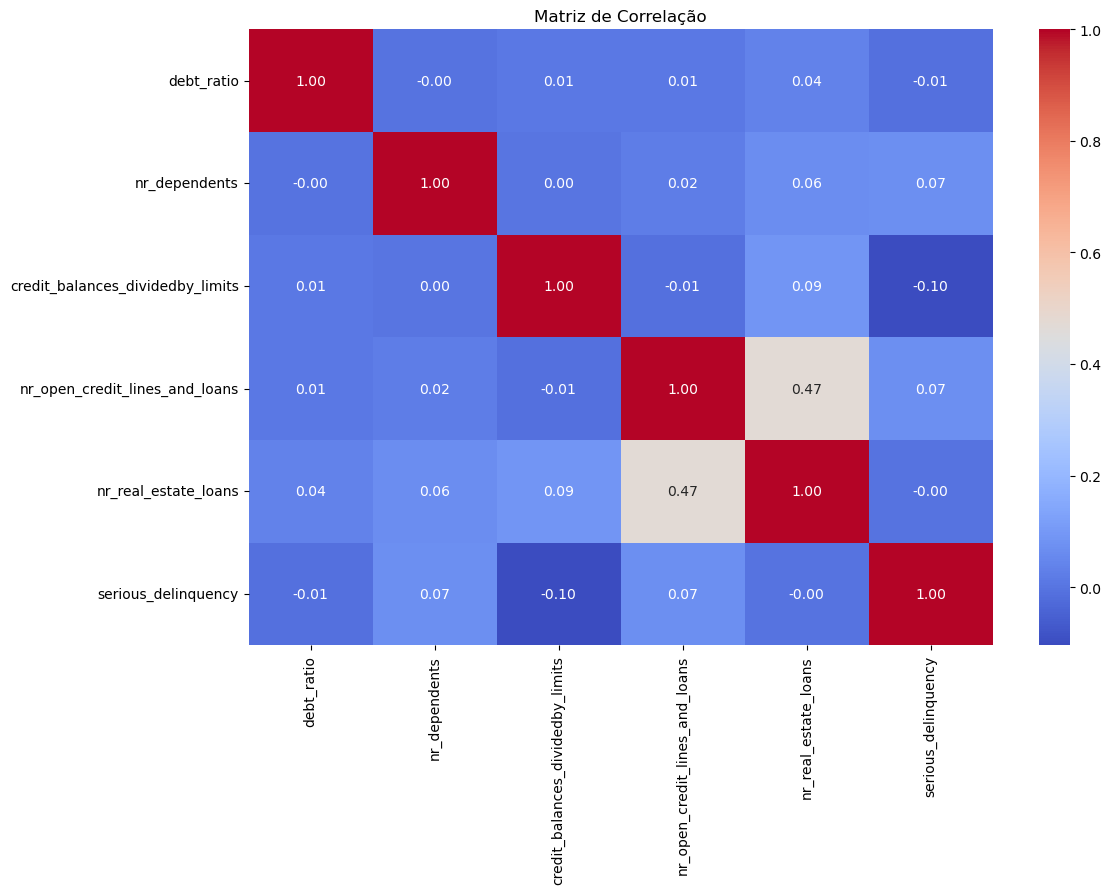

In [236]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(b.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

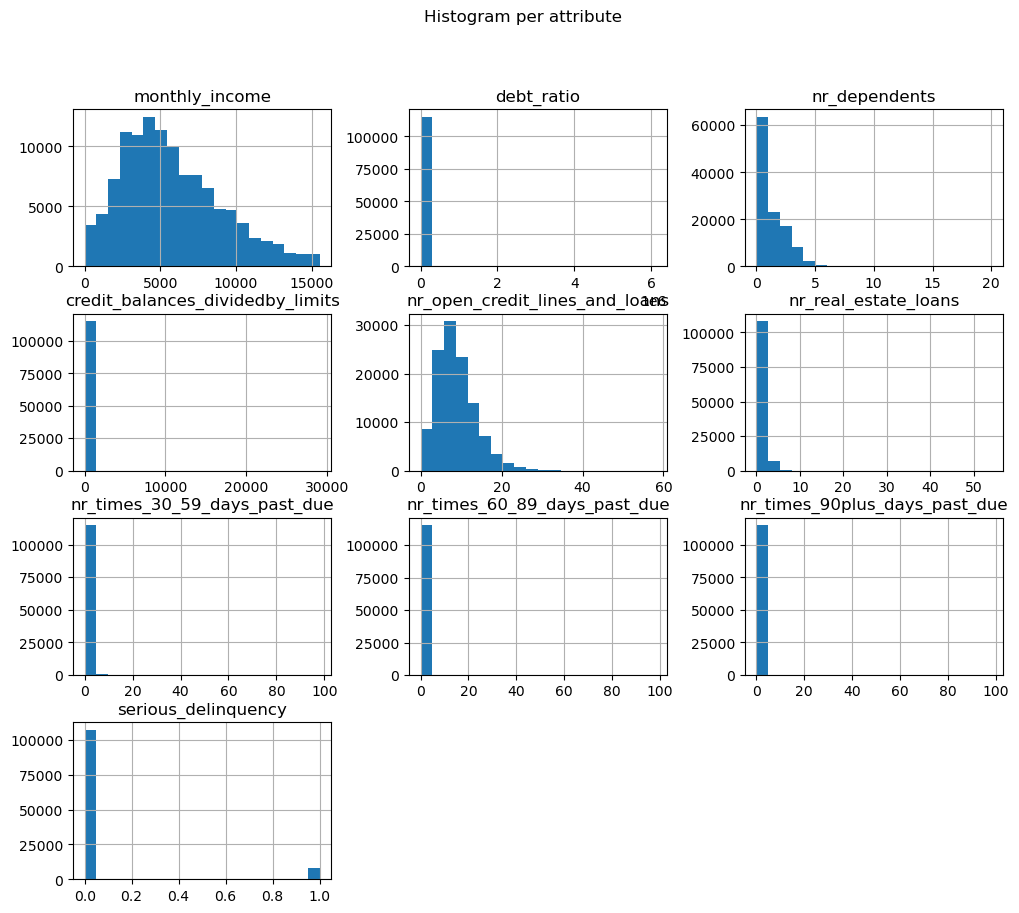

In [237]:
# Histograma para cada variável
df_copy_dropped.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram per attribute')  
plt.xlabel('Value')
plt.ylabel('Counts')

plt.show()

In [238]:
# Scatter plot para combinações de variáveis --- SO FAZER C/ MENOR QUANTIDADE DE DADOS!
# sns.pairplot(df_copy_dropped, hue='serious_delinquency')
# plt.show()

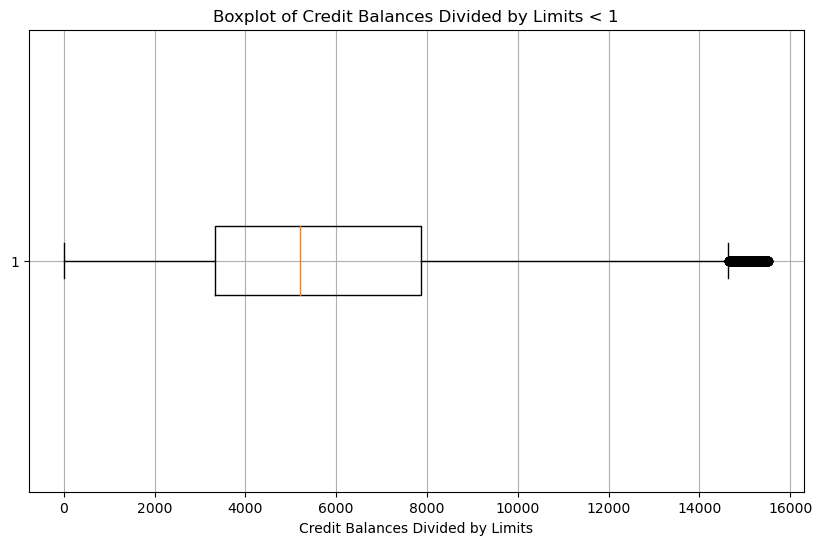

In [239]:
# Create a boxplot of 'credit_balances_dividedby_limits' with a filter
plt.figure(figsize=(10, 6))
# plt.boxplot(df_copy_dropped[df_copy_dropped['credit_balances_dividedby_limits'] < 1]['credit_balances_dividedby_limits'], vert=False)
# plt.boxplot(df_copy['monthly_income'].dropna() , vert=False)
plt.boxplot(df_copy_dropped[(df_copy_dropped['credit_balances_dividedby_limits'] <= 1) & (df_copy_dropped['monthly_income'] < 30000)]['monthly_income'].dropna(), vert=False)

plt.title('Boxplot of Credit Balances Divided by Limits < 1')
plt.xlabel('Credit Balances Divided by Limits')
plt.grid(True)
plt.show()

In [242]:
# bins = [-float('inf'), 5000, 10000, 30000, 50000, 100000, 500000, float('inf')]
# labels = ['<=5000', '5000-10000', '10000-30000', '30000-50000', '50000-100000', '100000-500000','>500000']
df_copy_dropped2 = df_copy_dropped[df_copy_dropped['monthly_income']<15000]
# Generate 6 equally spaced bins based on the min and max salary
bins = np.linspace(df_copy_dropped2['monthly_income'].min(), df_copy_dropped2['monthly_income'].max(), 7)
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

copy2 = df_copy_dropped2.copy()
# Categorize the 'monthly_income' values
copy2['monthly_income'] = pd.cut(df_copy_dropped2['monthly_income'], bins=bins, labels=labels, right=False)

# Display the DataFrame
copy2

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,7499-9999,80.0,2.0,0.766127,13,6,2,0,0,1
1,2499-4999,12.0,1.0,0.957151,4,0,0,0,0,0
2,2499-4999,9.0,0.0,0.658180,2,0,1,0,1,0
3,2499-4999,4.0,0.0,0.233810,5,0,0,0,0,0
5,2499-4999,38.0,1.0,0.213179,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
149994,2499-4999,40.0,0.0,0.385742,7,0,0,0,0,0
149995,0-2499,23.0,0.0,0.040674,4,1,0,0,0,0
149996,4999-7499,72.0,2.0,0.299745,4,1,0,0,0,0
149998,4999-7499,0.0,0.0,0.000000,4,0,0,0,0,0


C:\Users\inesm\AppData\Local\Temp\ipykernel_18224\1937689540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_dropped2['income_category'] = pd.cut(df_copy_dropped2['monthly_income'], bins=bins, labels=labels, right=False)


<Figure size 1200x600 with 0 Axes>

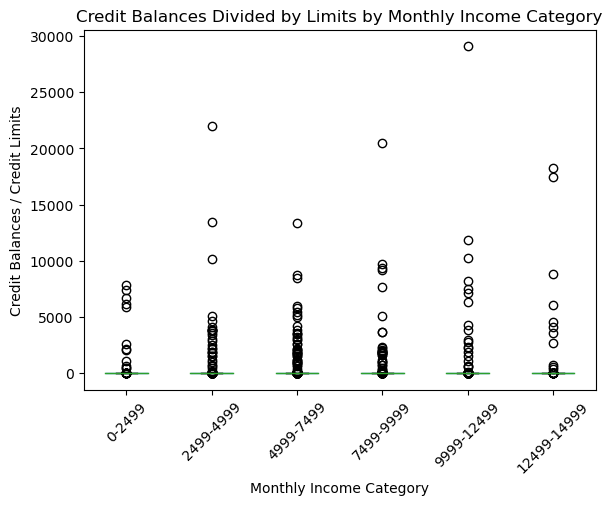

In [243]:
# Categorize the 'monthly_income' values
df_copy_dropped2['income_category'] = pd.cut(df_copy_dropped2['monthly_income'], bins=bins, labels=labels, right=False)

# Create a box plot
plt.figure(figsize=(12, 6))
df_copy_dropped2.boxplot(column='credit_balances_dividedby_limits', by='income_category', grid=False, patch_artist=True)

# Set the title and labels
plt.title('Credit Balances Divided by Limits by Monthly Income Category')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Monthly Income Category')
plt.ylabel('Credit Balances / Credit Limits')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [245]:
df_copy_dropped[df_copy_dropped['monthly_income']<20000]

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.0,80.0,2.0,0.766127,13,6,2,0,0,1
1,2600.0,12.0,1.0,0.957151,4,0,0,0,0,0
2,3042.0,9.0,0.0,0.658180,2,0,1,0,1,0
3,3300.0,4.0,0.0,0.233810,5,0,0,0,0,0
5,3500.0,38.0,1.0,0.213179,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
149994,3400.0,40.0,0.0,0.385742,7,0,0,0,0,0
149995,2100.0,23.0,0.0,0.040674,4,1,0,0,0,0
149996,5584.0,72.0,2.0,0.299745,4,1,0,0,0,0
149998,5716.0,0.0,0.0,0.000000,4,0,0,0,0,0


In [246]:
df_copy_dropped[:80]

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.0,80.0,2.0,0.766127,13,6,2,0,0,1
1,2600.0,12.0,1.0,0.957151,4,0,0,0,0,0
2,3042.0,9.0,0.0,0.658180,2,0,1,0,1,0
3,3300.0,4.0,0.0,0.233810,5,0,0,0,0,0
5,3500.0,38.0,1.0,0.213179,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88,4716.0,59.0,2.0,0.734478,13,2,0,0,0,1
89,4916.0,49.0,0.0,0.080564,15,2,0,0,0,0
90,0.0,1546600.0,0.0,0.039388,7,0,0,0,0,0
91,10500.0,12.0,0.0,0.023767,13,0,0,0,0,0


# Copy of df after data transformations

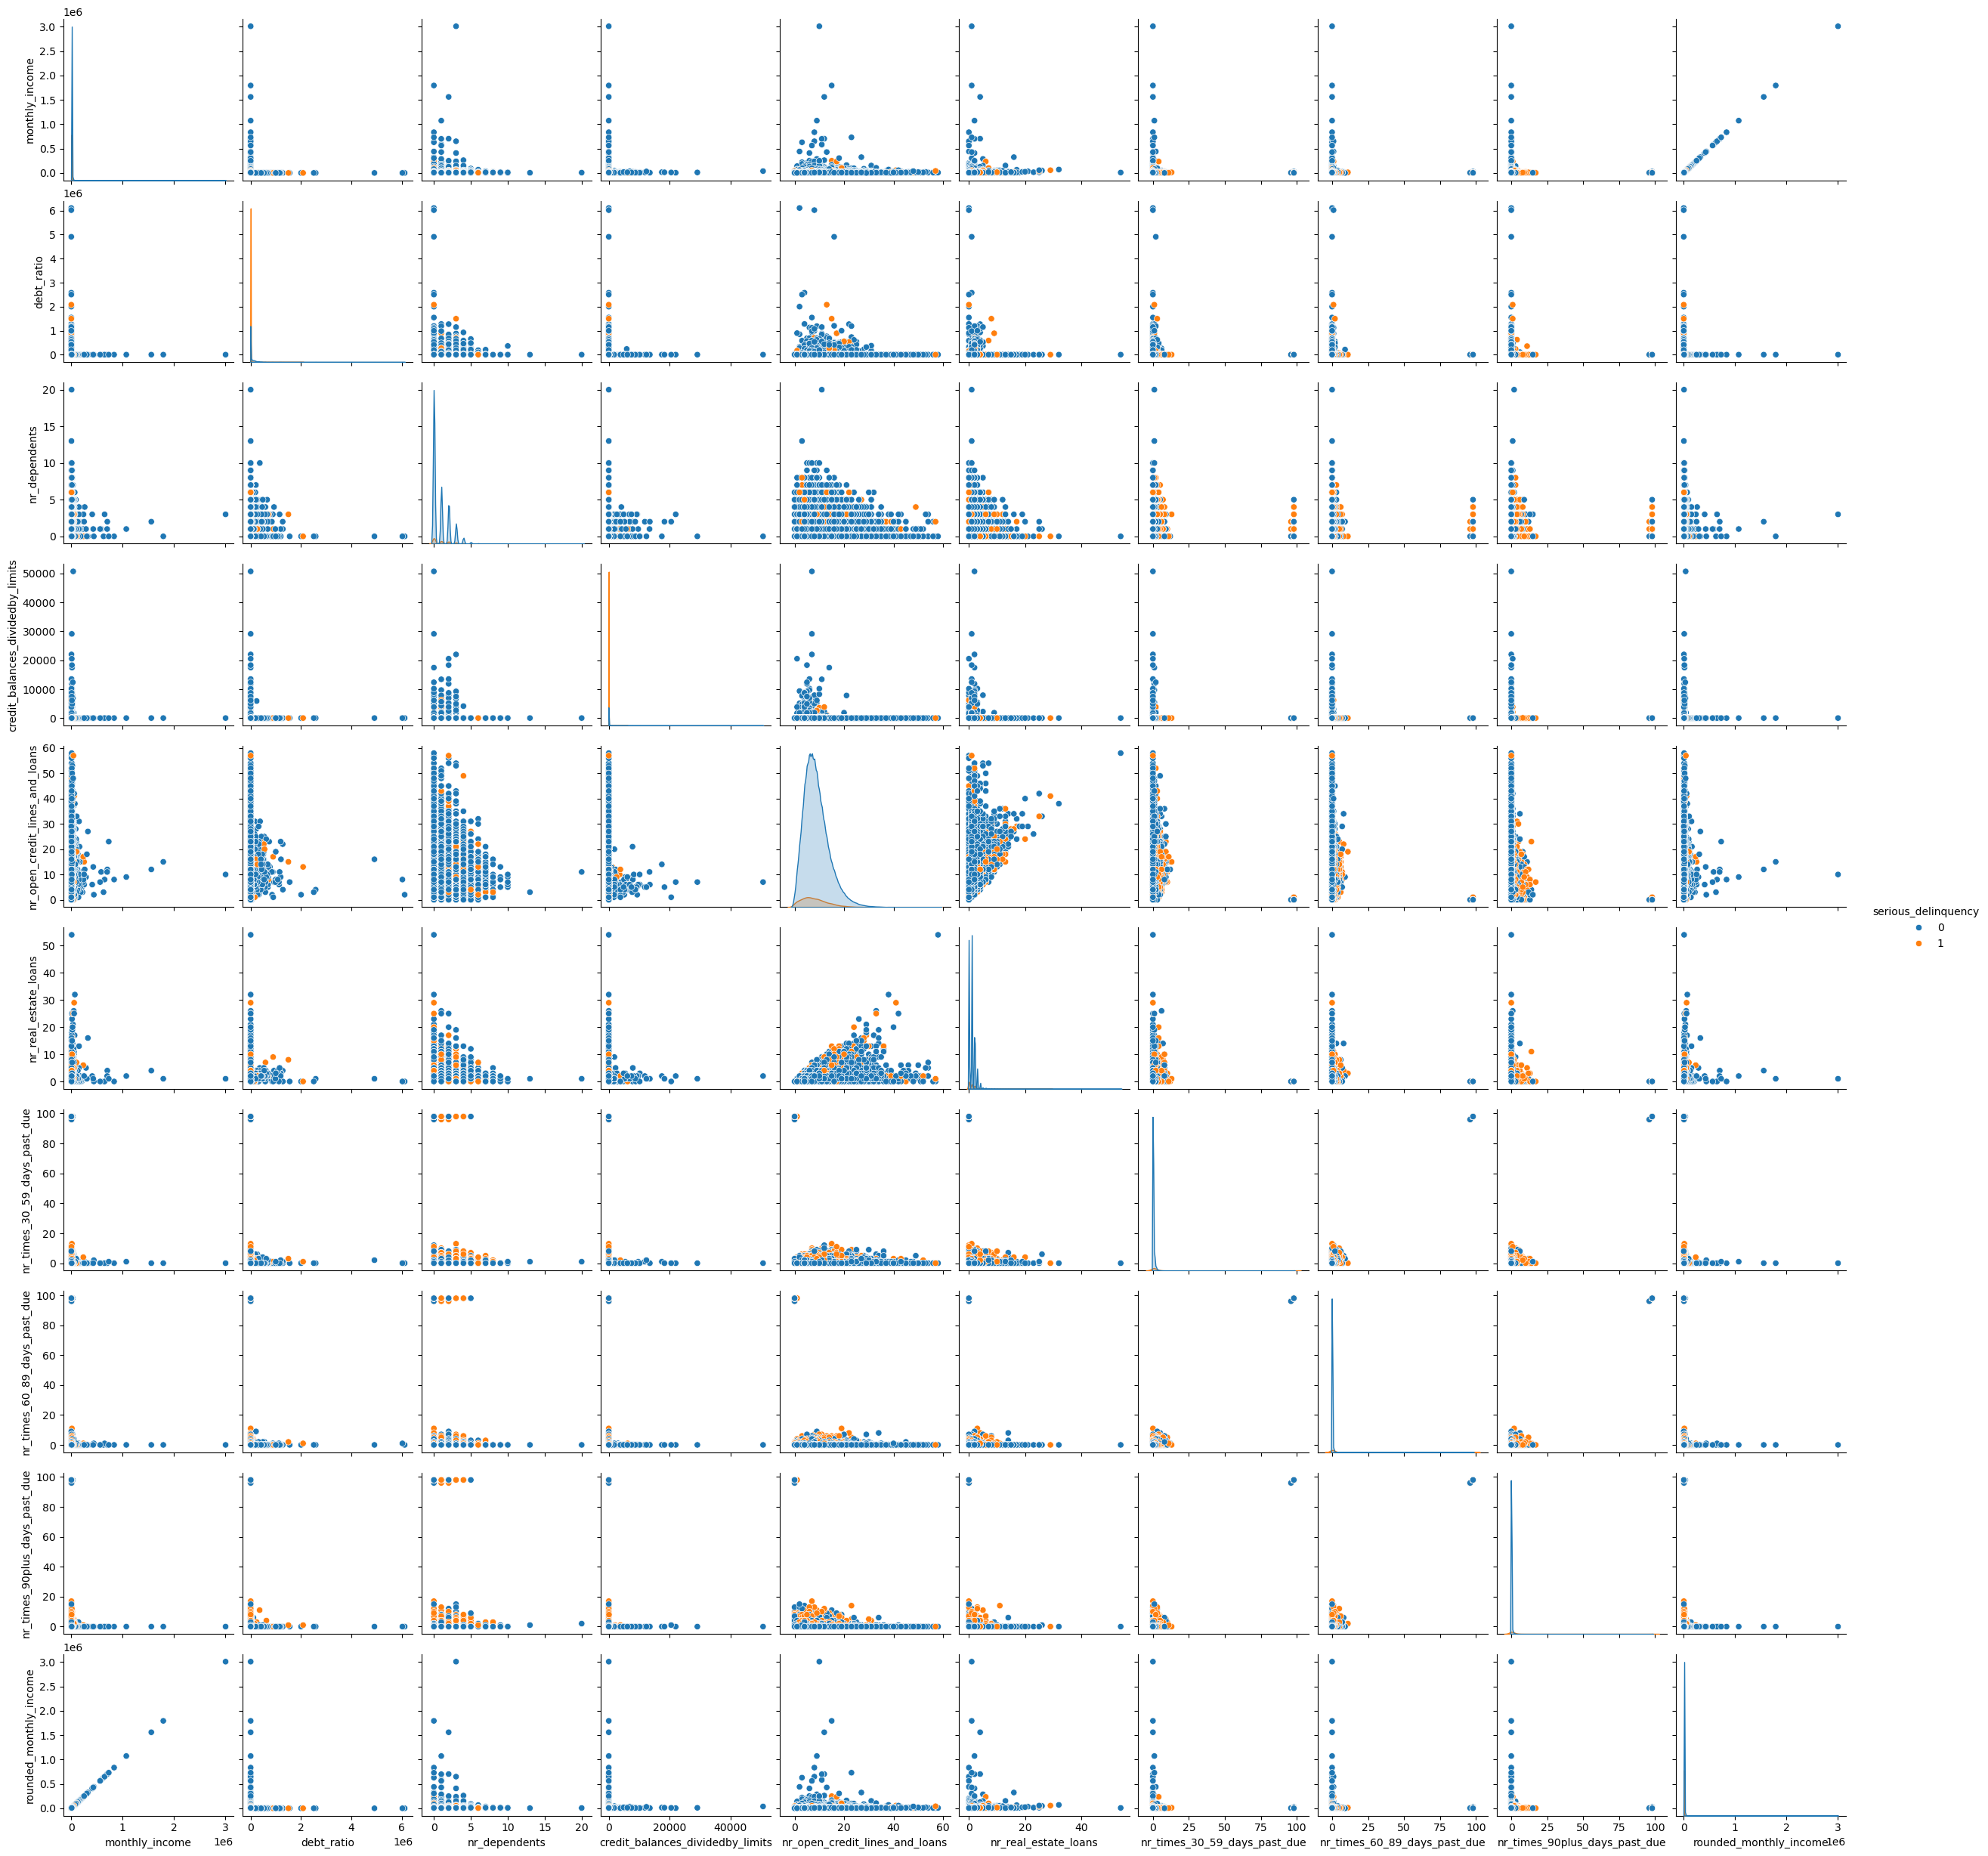

In [48]:
# Visualize all possible combinations of features
sns.pairplot(df_copy_dropped, hue='serious_delinquency') 
plt.show()

# Data Understanding

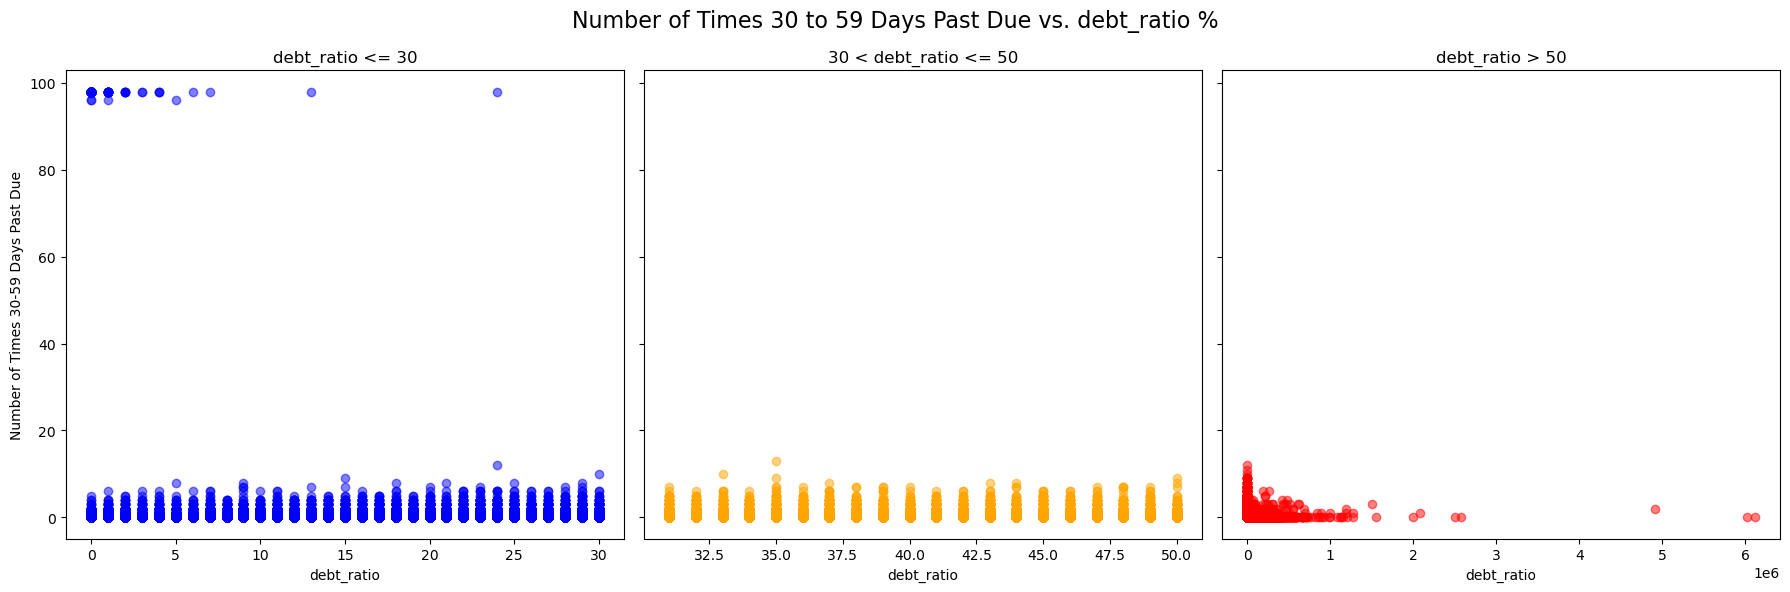

In [248]:
# Categorize the debt_ratio %
blue_cases = df_copy_dropped[df_copy_dropped['debt_ratio'] <= 30]
orange_cases = df_copy_dropped[(df_copy_dropped['debt_ratio'] > 30) & (df_copy_dropped['debt_ratio'] <= 50)]
red_cases = df_copy_dropped[df_copy_dropped['debt_ratio'] > 50]

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Set a title for the entire figure
fig.suptitle('Number of Times 30 to 59 Days Past Due vs. debt_ratio %', fontsize=16)

# Plot blue cases
axes[0].scatter(blue_cases['debt_ratio'], blue_cases['nr_times_30_59_days_past_due'], color='blue', alpha=0.5)
axes[0].set_title('debt_ratio <= 30')
axes[0].set_xlabel('debt_ratio')
axes[0].set_ylabel('Number of Times 30-59 Days Past Due')

# Plot orange cases
axes[1].scatter(orange_cases['debt_ratio'], orange_cases['nr_times_30_59_days_past_due'], color='orange', alpha=0.5)
axes[1].set_title('30 < debt_ratio <= 50')
axes[1].set_xlabel('debt_ratio')

# Plot red cases
axes[2].scatter(red_cases['debt_ratio'], red_cases['nr_times_30_59_days_past_due'], color='red', alpha=0.5)
axes[2].set_title('debt_ratio > 50')
axes[2].set_xlabel('debt_ratio')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


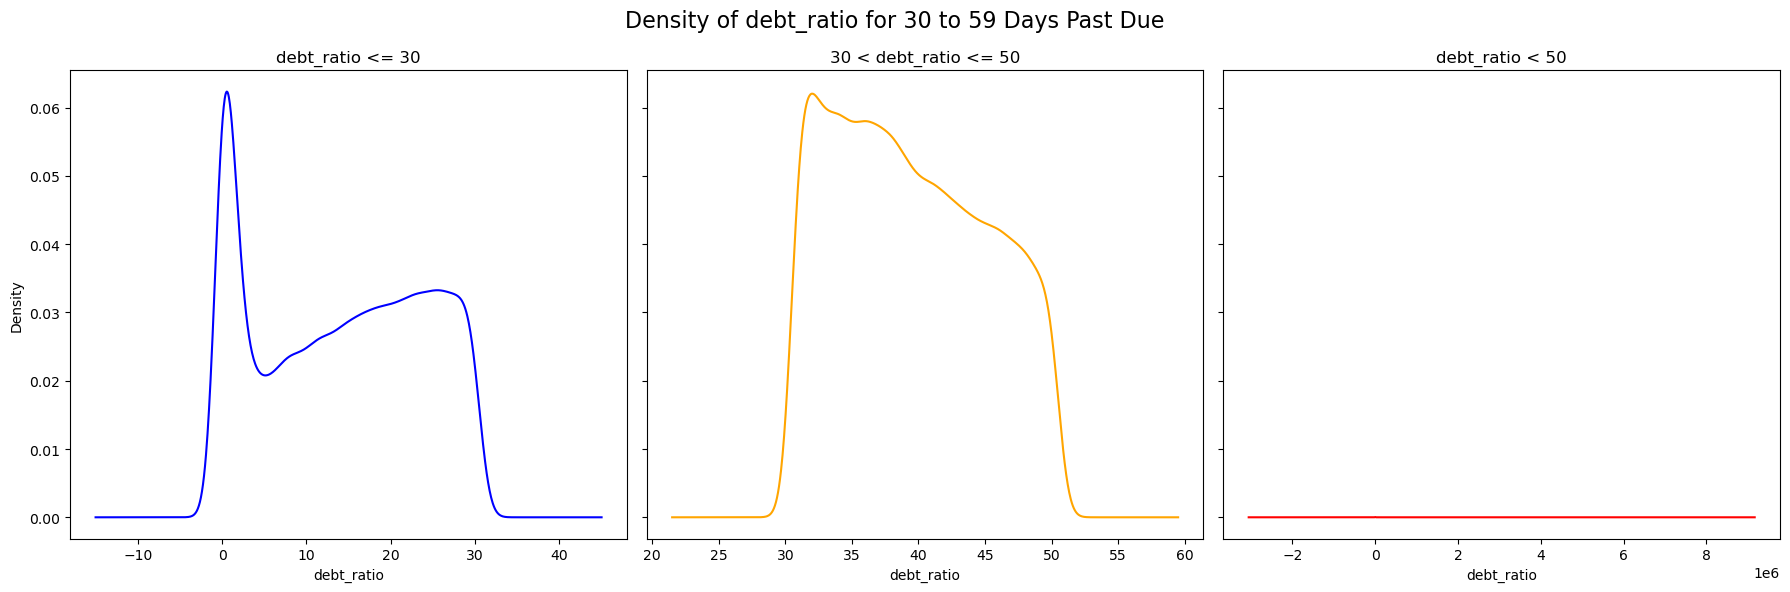

In [249]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Set a title for the entire figure
fig.suptitle('Density of debt_ratio for 30 to 59 Days Past Due', fontsize=16)

# Plot blue cases
blue_cases['debt_ratio'].plot.density(ax=axes[0], color='blue')
axes[0].set_title('debt_ratio <= 30')
axes[0].set_xlabel('debt_ratio')
axes[0].set_ylabel('Density')

# Plot orange cases
orange_cases['debt_ratio'].plot.density(ax=axes[1], color='orange')
axes[1].set_title('30 < debt_ratio <= 50')
axes[1].set_xlabel('debt_ratio')
axes[1].set_ylabel('Density')

# Plot red cases
red_cases['debt_ratio'].plot.density(ax=axes[2], color='red')
axes[2].set_title('debt_ratio < 50')
axes[2].set_xlabel('debt_ratio')
axes[2].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
